In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

import matplotlib
matplotlib.use('Agg')
from common.visualization import *
from matplotlib.collections import LineCollection

%matplotlib inline

In [2]:
def wild2human36m_2d(keypoints_2d_wild):
    # pair : [human3.6, wild]
    # 亚鲁 format
    selected_keypoints_id = [(10, 2), (9, 29), (8, 18), (14, 22), 
                             (11, 27), (15, 23), (12, 28), (16, 8), 
                             (13, 14), (7, 17), (0, 0), (1, 19), 
                             (2, 20), (3, 5), (4, 24), (5, 25), (6, 11)]

    pair_dict = {}
    for pair in selected_keypoints_id:
        pair_dict[pair[0]] = pair[1]
        
    # wild : use id as key
    keypoints_2d_converted = {}
    for i, item in enumerate(keypoints_2d_wild.keys()):
        keypoints_2d_converted[keypoints_2d_wild[item]["id"]] = {"name" : item,
                                                                 "position" : (keypoints_2d_wild[item]["x"], 
                                                                               keypoints_2d_wild[item]["y"])}

    keypoints_2d_converted[29] = {
        "name" : "neck_2",
        "position" : ((keypoints_2d_converted[2]["position"][0] + keypoints_2d_converted[18]["position"][0])/2,
                      (keypoints_2d_converted[2]["position"][1] + keypoints_2d_converted[18]["position"][1])/2)
    }
    
    # human3.6 : use id as key
    keypoints_2d_h36m = {}
    for pair in selected_keypoints_id:
        keypoints_2d_h36m[pair[0]] = keypoints_2d_converted[pair[1]]["position"]
    
    # convert to np array
    return np.array([keypoints_2d_h36m[i] for i in range(17)])

In [3]:
with open("./wild_data/1.json", 'r') as f:
    data = json.loads(f.read())
    
img = plt.imread("./wild_data/1.jpg")

In [4]:
dataset_path = "./data/data_3d_h36m.npz"
print('Loading dataset...')
from common.h36m_dataset import Human36mDataset
dataset = Human36mDataset(dataset_path)
skeleton = dataset.skeleton()

Loading dataset...


In [5]:
keypoints_2d_wild = data["ScreenPos"]
keypoints_2d = keypoints_2d_wild

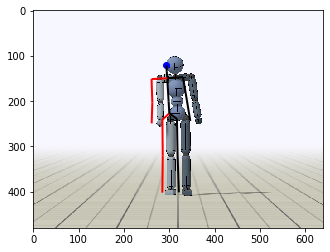

In [6]:
keypoints_2d_np = wild2human36m_2d(keypoints_2d_wild)
display_2D_skeleton(keypoints_2d_np, skeleton, img)

In [ ]:
# keypoints_2d = data["ScreenPos"]

# # pair : [human3.6, wild]
# selected_keypoints_id = [(10, 2), (9, 29), (8, 18), (14, 22), 
#                          (11, 27), (15, 23), (12, 28), (16, 8), 
#                          (13, 14), (7, 17), (0, 0), (1, 19), 
#                          (2, 20), (3, 5), (4, 24), (5, 25), (6, 11)]

# pair_dict = {}
# for pair in selected_keypoints_id:
#     pair_dict[pair[0]] = pair[1]

In [ ]:
# # wild : use id as key
# keypoints_2d_converted = {}
# for i, item in enumerate(keypoints_2d.keys()):
#     keypoints_2d_converted[keypoints_2d[item]["id"]] = {"name" : item,
#                                                         "position" : (keypoints_2d[item]["x"], keypoints_2d[item]["y"])}
    
# keypoints_2d_converted[29] = {
#     "name" : "neck_2",
#     "position" : ((keypoints_2d_converted[2]["position"][0] + keypoints_2d_converted[18]["position"][0])/2,
#                   (keypoints_2d_converted[2]["position"][1] + keypoints_2d_converted[18]["position"][1])/2)
# }

In [ ]:
# # human3.6 : use id as key
# keypoints_2d_new = {}
# for pair in selected_keypoints_id:
#     keypoints_2d_new[pair[0]] = keypoints_2d_converted[pair[1]]["position"]

In [ ]:
# keypoints_2d_np = np.array([keypoints_2d_new[i] for i in range(17)])

In [ ]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(1,1,1, aspect='equal')
# # ax.scatter(keypoints_2d_converted["chest"]['x'], keypoints_2d_converted["chest"]['y'], color="g", s=50)
# # ax.scatter(keypoints_2d_converted[19]["position"][0], keypoints_2d_converted[19]["position"][1], color="g", s=50)
# m = 16
# print(pair_dict[m])
# print(keypoints_2d_converted[pair_dict[m]])
# ax.scatter(keypoints_2d_converted[pair_dict[m]]["position"][0], 
#            keypoints_2d_converted[pair_dict[m]]["position"][1], color="g", s=50)
# ax.imshow(img)

In [ ]:
# def display_2D_skeleton_beta(keypoints, skeleton, img = None):
#     line_segs = []
#     cols = []
#     for j, j_parent in enumerate(skeleton.parents()):    
#         if j_parent == -1:
#             continue
    
#         if len(skeleton.parents()) == keypoints.shape[0]:
#             col = 'red' if j in skeleton.joints_right() else 'black'
#             cols.append(col)  
#             line_segs.append([(keypoints[j, 0], keypoints[j, 1]), (keypoints[j_parent, 0], keypoints[j_parent, 1])])
    
    
    
#     lc = LineCollection(line_segs, colors = cols, linewidths=2)
#     fig = plt.figure(figsize=(10,10))
#     ax = fig.add_subplot(1,1,1, aspect='equal')

#     # highlight certain points
#     #     m = 1
#     #     ax.scatter(keypoints[m, 0], keypoints[m, 1], color="g", s=50)

#     if img is None:
#         # xlims, ylims
#         top = 0
#         left = 0
#         bottom = keypoints[:,1].max()
#         right = keypoints[:,0].max()
#         ax.set_ylim(top, bottom)
#         ax.set_xlim(left, right)
#         ax.invert_yaxis()
        
#     else:
#         ax.imshow(img)
#     ax.add_collection(lc)
    
#     plt.show()